In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Live Demo Regression Models

In [19]:
# Data genenrating - linear function
num_points = 100
x = np.linspace(-3, 3, num_points)
y = 2 * x + 3

#Create noise - loc = 0 is the average value of the noise
y_noise = np.random.normal(loc = 0, scale = 1, size = num_points)
y += y_noise

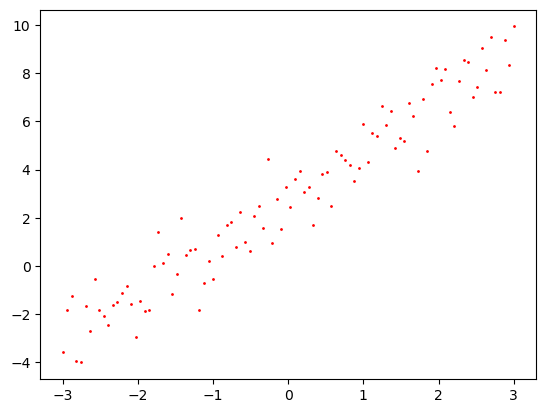

In [20]:
plt.scatter(x, y, c = 'r', s = 1)
plt.show()